In [ ]:
from typing import Optional, Union
from src.nx_hif.hif import *
from src.nx_hif import readwrite

import networkx as nx
import networkx_temporal as tx
from networkx_temporal import temporal_graph
from networkx_temporal.typing import StaticGraph, TemporalGraph

# https://github.com/nelsonaloysio/networkx-temporal/blob/ea382432dca574e531600a7e36daa79aa37f599e/src/networkx_temporal/readwrite/hif.py
def read_hif(
    filepath: str,
    directed: bool = None,
    multigraph: bool = None,
    create_using: Optional[Union[TemporalGraph, StaticGraph]] = None,
):
    H = readwrite.read_hif(filepath)
    # cc = sorted(nx.connected_components(H.to_undirected()), key=len, reverse=True)
    # H = H.subgraph(cc[0])
    TG = temporal_graph(directed=directed, multigraph=multigraph, create_using=create_using)

    for nx_id_edge, _nx_id_node, edge, node, _dir, _key in hif_incidences(H):
        TG.add_edge(edge, node, **H.nodes[nx_id_edge])

    return TG

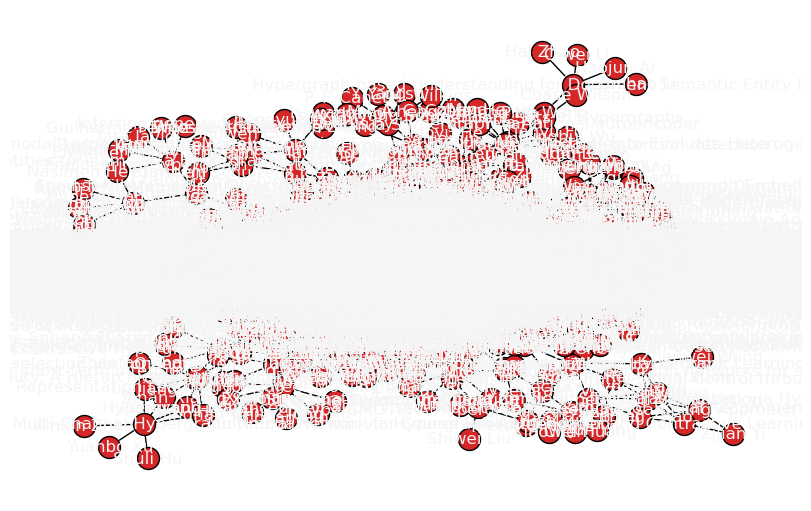

In [8]:
TG = read_hif("data/publications.hif.json")
tx.draw(TG, layout="kamada_kawai", figsize=(8,5))

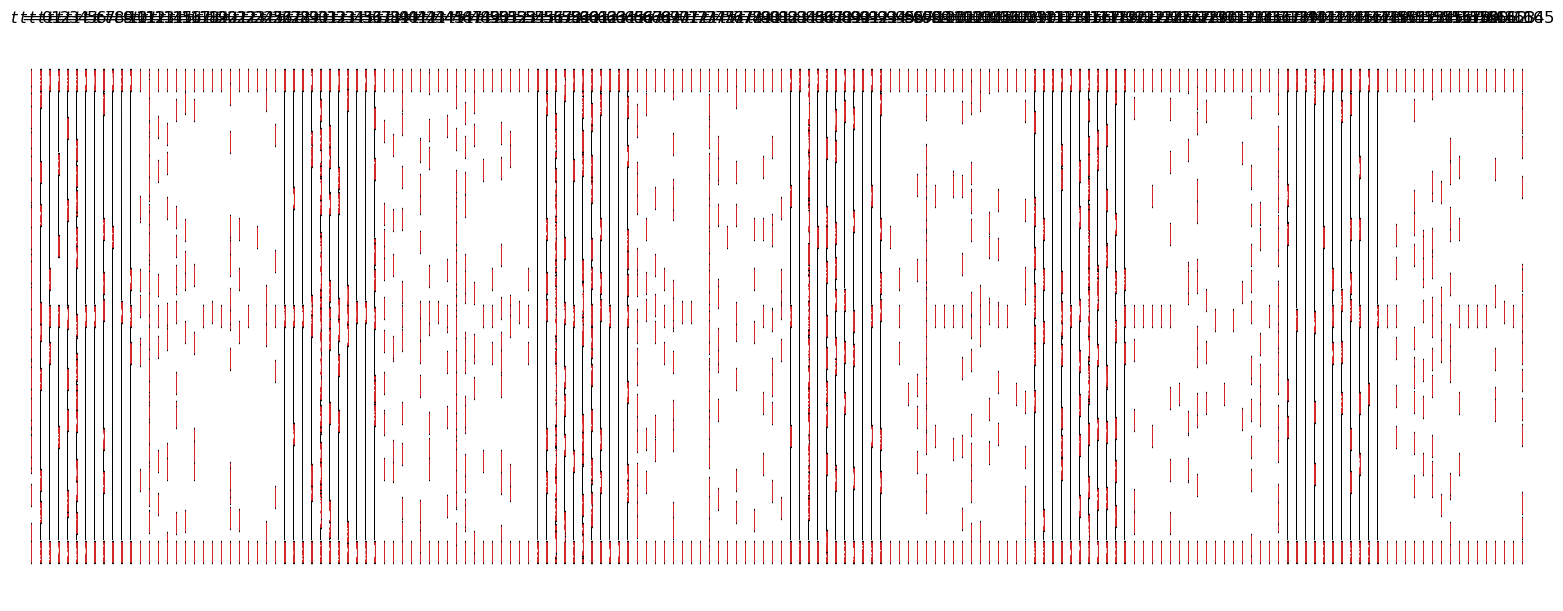

In [9]:
# Slice it into snapshots.
TG2 = TG.slice(attr="date")
tx.draw(TG2, layout="kamada_kawai", figsize=(15,6))